<a href="https://colab.research.google.com/github/LeoFernanndes/notebooks/blob/master/titanic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Titanic
## Methodology for evaluating model performance


In [0]:
import pandas as pd 


url = 'https://raw.githubusercontent.com/LeoFernanndes/datasets/master/titanic_%20train.csv' 
titanic = pd.read_csv(url)

'''
colunas = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
'''

"\ncolunas = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',\n       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']\n"

In [0]:
# filling in the gaps

titanic0 = titanic.copy().loc[titanic['Survived'] == 0]
for column in titanic.columns:
  if titanic0[column].dtype != 'object':
      titanic0[column].fillna(titanic0[column].mean(), inplace= True)
  else:
      titanic0[column] = titanic0[column].astype('str')
      titanic0[column].fillna(titanic0[column].mode(), inplace= True)

titanic1 = titanic.copy().loc[titanic['Survived'] == 1]
for column in titanic.columns:
  if titanic1[column].dtype != 'object':
      titanic1[column].fillna(titanic1[column].mean(), inplace= True)
  else:
      titanic1[column] = titanic1[column].astype('str')
      titanic1[column].fillna(titanic1[column].mode(), inplace= True)

In [0]:
titanic_df = pd.concat([titanic0, titanic1]).sort_index()

In [0]:
# encoding data


from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for column in titanic_df.columns:
  if titanic_df[column].dtype == 'object':
    titanic_df[column] = le.fit_transform(titanic_df[column])

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from xgboost import XGBClassifier

colors = ['b', 'g', 'r', 'c', 'm'] 

clf = [[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'blue'],
        
       [GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), 'green'],
       
       [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'red'],
       
       [XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 'cyan']]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False) 

    n_features   feature  accuracy
2           2       Age  0.832402
5           5    Ticket  0.820225
7           7     Cabin  0.815642
8           8  Embarked  0.815642
4           4     Parch  0.810056
3           3     SibSp  0.804469
6           6      Fare  0.804469
1           1       Sex  0.748603
0           0    Pclass  0.603352 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           

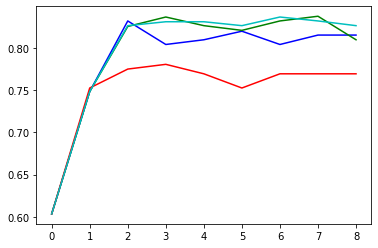

In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns


colunas = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

colunas = ['Fare', 'Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Embarked']

x = titanic_df[colunas]
y = titanic_df['Survived']


for model in clf:
  
  x_label = []
  y_label = []
  features = []
  iterations = 5
  n_features = len(colunas)

  for i in range(n_features):
    result = cross_val_score(model[0], x[colunas[0: i+1]], y, cv= iterations)
    result_s = pd.Series(result).min()

    x_label.append(i)
    y_label.append(result_s)
    
    features.append(colunas[i])
    
  plt.plot(x_label, y_label, color= model[1])     

  df_error = pd.DataFrame({'n_features': x_label,
                           'feature': features,
                           'accuracy': y_label}).sort_values(by= 'accuracy', ascending= False)

  print(model[0], 2*'\n',
        df_error, '\n')

plt.show()

In [0]:
url_teste = 'https://raw.githubusercontent.com/LeoFernanndes/datasets/master/titanic_test.csv'
teste = pd.read_csv(url_teste)

# lidando com os dados faltantes na coluna escolhida
for column in teste.columns:
    if teste[column].dtype != 'object':
        teste[column].fillna(teste[column].mean(), inplace= True)
    else:
        teste[column] = teste[column].astype('str')
        teste[column].fillna(teste[column].mode(), inplace= True)
        

for column in teste.columns:
    if teste[column].dtype == 'object':
        teste[column] = le.fit_transform(teste[column])
        

In [0]:
n = 3 # number of features
colunas_ = colunas[0:n+1]

In [0]:
clf_ = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

clf_.fit(x[colunas_], y)

y_pred = clf_.predict(teste[colunas_])

## montado o dataset resposta para ser enviado
# subido o template
df = pd.read_csv(url_teste)
envio = pd.DataFrame({'PassengerId': df['PassengerId'], 'Survived': y_pred}).set_index(['PassengerId'])

In [0]:
from google.colab import files


envio.to_csv('titanic_submission_3.csv')